## Descriptive Analytics for Numerical Columns

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import OneHotEncoder

In [2]:
df= pd.read_csv('sales_data_with_discounts.csv')

In [3]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [4]:
df.columns

Index(['Date', 'Day', 'SKU', 'City', 'Volume', 'BU', 'Brand', 'Model',
       'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [5]:
num_col= [i for i in df.columns if df[i].dtype!='O']
num_col

['Volume',
 'Avg Price',
 'Total Sales Value',
 'Discount Rate (%)',
 'Discount Amount',
 'Net Sales Value']

In [6]:
## mean of single column(Volume)

In [7]:
volume= df['Volume'] 
volume

0      15
1      10
2       7
3       6
4       3
       ..
445     2
446     6
447     2
448     3
449     1
Name: Volume, Length: 450, dtype: int64

In [8]:
volume_mean=np.mean(volume)
volume_mean

5.066666666666666

In [9]:
## printing all the statistical information

In [10]:
num_col

['Volume',
 'Avg Price',
 'Total Sales Value',
 'Discount Rate (%)',
 'Discount Amount',
 'Net Sales Value']

In [11]:
for col in num_col:
    print(f"statistics of {col}:")
    print(f"mean of {col}:{df[col].mean()}")
    print(f"median of {col}:{df[col].median()}")
    print(f"mode of {col}:{df[col].mode()[0]}")
    print(f"Standard Deviation of {col}:{df[col].std()}")
    print("\n")

statistics of Volume:
mean of Volume:5.066666666666666
median of Volume:4.0
mode of Volume:3
Standard Deviation of Volume:4.231602391213926


statistics of Avg Price:
mean of Avg Price:10453.433333333332
median of Avg Price:1450.0
mode of Avg Price:400
Standard Deviation of Avg Price:18079.90483993645


statistics of Total Sales Value:
mean of Total Sales Value:33812.83555555555
median of Total Sales Value:5700.0
mode of Total Sales Value:24300
Standard Deviation of Total Sales Value:50535.07417255328


statistics of Discount Rate (%):
mean of Discount Rate (%):15.15524189533091
median of Discount Rate (%):16.57776564929597
mode of Discount Rate (%):5.007822189204133
Standard Deviation of Discount Rate (%):4.220602153325511


statistics of Discount Amount:
mean of Discount Amount:3346.499424342415
median of Discount Amount:988.9337332382784
mode of Discount Amount:69.17794228822787
Standard Deviation of Discount Amount:4509.9029633539985


statistics of Net Sales Value:
mean of Net Sal

In [12]:
# 1.volume
#The average sales volume is around 5 units, but the most frequent sale involves 3 units. The spread in the data indicates that volumes vary significantly, with some transactions involving higher or lower volumes.

#2.Average price
#Although the mean price is high, the median and mode are much lower, indicating that the dataset is heavily skewed by a few high-priced items. The large standard deviation confirms significant variability in prices.

#3.Total sales value
#While the average total sales value is high, most sales are much smaller, as indicated by the lower median. The high standard deviation suggests that a few very large sales are skewing the data.

#4.Discount rate
#The typical discount rate applied is around 15-16%, though many transactions involve smaller discounts around 5%. There is a moderate spread in discount rates.

#5.Discount amount
#While the average discount amount is 3,346, most discounts are much smaller (as indicated by the median and mode). The large standard deviation suggests that a few very large discounts are inflating the mean.

#6.Net sales value
# Although the average net sales value is high, the median is much lower, indicating that most sales involve smaller amounts. A few very large net sales are likely skewing the mean, as indicated by the large standard deviation.

## Data Visualization

array([[<AxesSubplot:title={'center':'Volume'}>]], dtype=object)

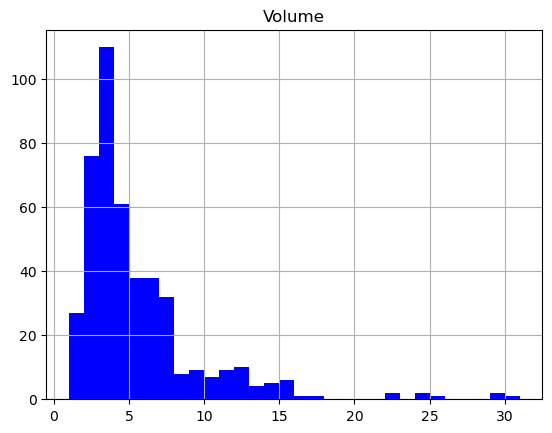

In [13]:
df.hist("Volume",bins=30,color="blue")

In [18]:
import matplotlib.pyplot as plt
from scipy.stats import skew

In [20]:
## To iterate btw all the cols

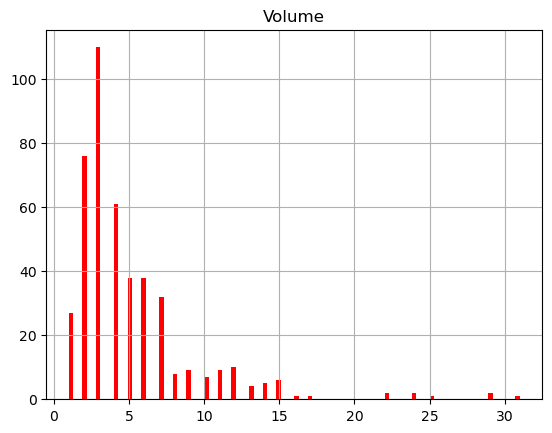

Skewness of Volume: 2.7226094367513567
Number of outliers in Volume: 44


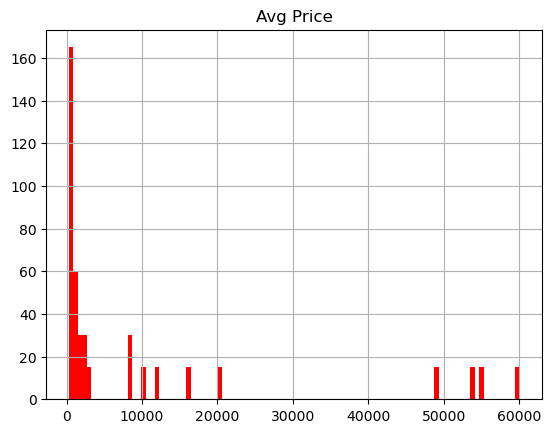

Skewness of Avg Price: 1.9025042657554003
Number of outliers in Avg Price: 60


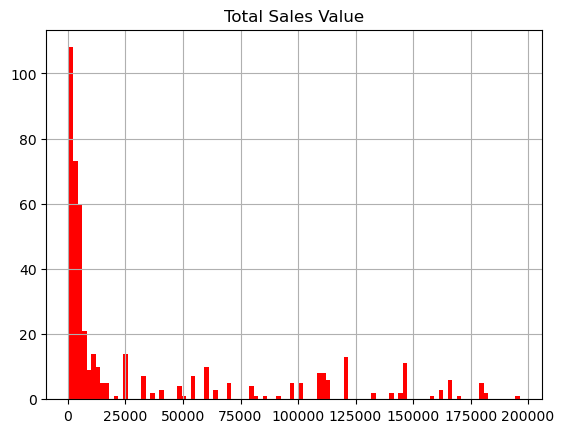

Skewness of Total Sales Value: 1.529608815284332
Number of outliers in Total Sales Value: 36


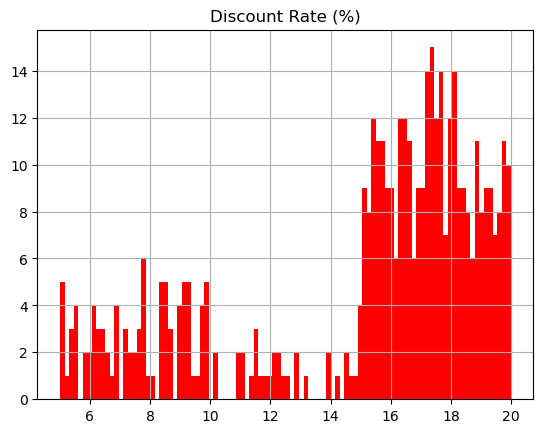

Skewness of Discount Rate (%): -1.0587501046709231
Number of outliers in Discount Rate (%): 45


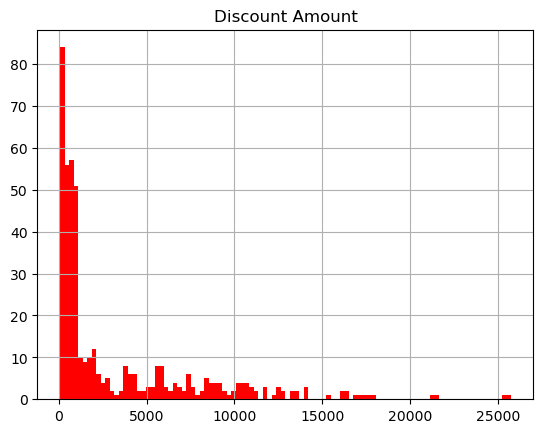

Skewness of Discount Amount: 1.9066550278687509
Number of outliers in Discount Amount: 24


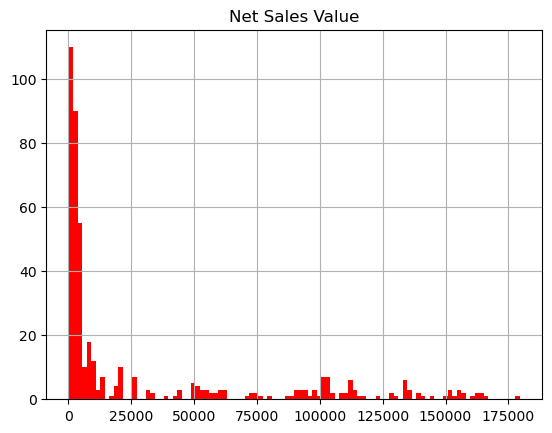

Skewness of Net Sales Value: 1.535680921975744
Number of outliers in Net Sales Value: 35


In [19]:
for col in num_col:
    df.hist( col ,bins=100,color="red")
    plt.show()
    skewness= skew(df[col])
    print(f"Skewness of {col}: {skewness}")
    
# outliers
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Number of outliers in {col}: {len(outliers)}")    

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


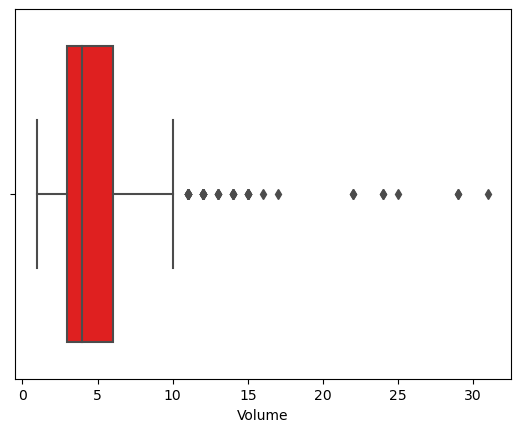

Number of outliers in Volume: 44
lower bound is -1.5
upper bound is 10.5
IQR is 3.0


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


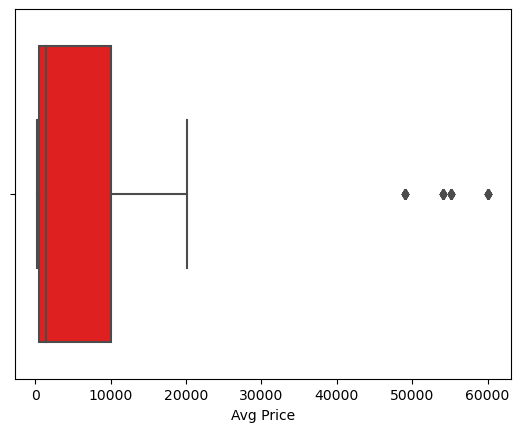

Number of outliers in Avg Price: 60
lower bound is -13987.5
upper bound is 24552.5
IQR is 9635.0


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


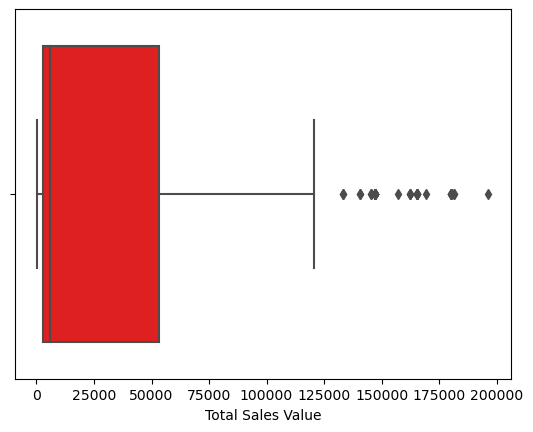

Number of outliers in Total Sales Value: 36
lower bound is -73050.0
upper bound is 128950.0
IQR is 50500.0


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


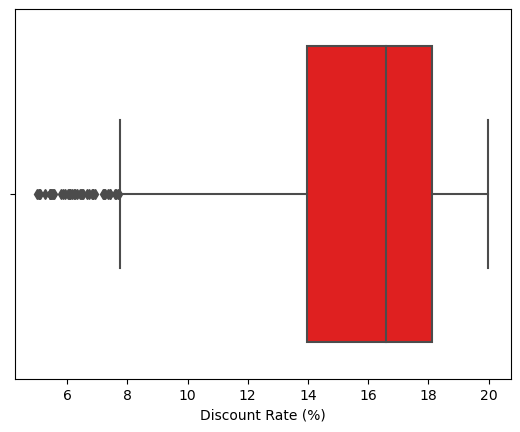

Number of outliers in Discount Rate (%): 45
lower bound is 7.740578642625298
upper bound is 24.339202378829146
IQR is 4.149655934050962


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


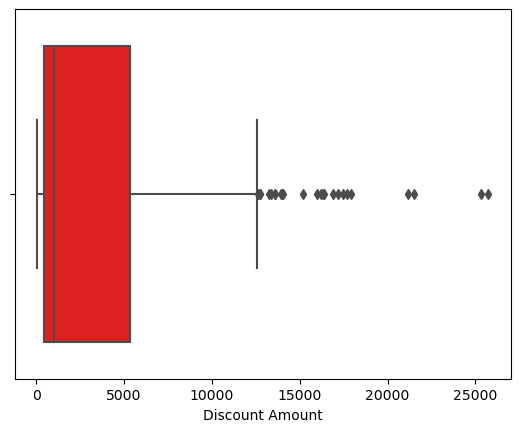

Number of outliers in Discount Amount: 24
lower bound is -6823.594880316146
upper bound is 12600.54961088833
IQR is 4856.03612280112


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


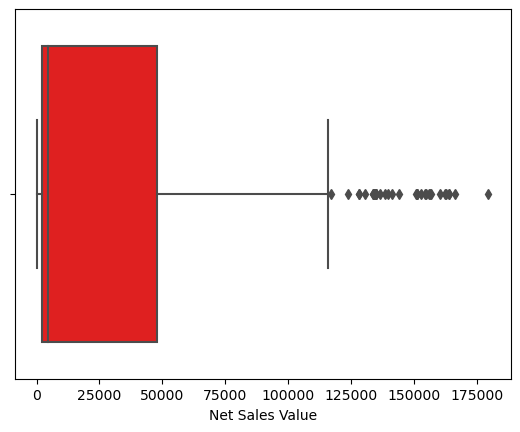

Number of outliers in Net Sales Value: 35
lower bound is -66266.347664084
upper bound is 116316.46916099661
IQR is 45645.70420627015


In [21]:
for col in num_col:
    sns.boxplot(df[col],color='red')
    plt.show()

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Number of outliers in {col}: {len(outliers)}")
    print(f"lower bound is {lower_bound}")
    print(f"upper bound is {upper_bound}")
    print(f"IQR is {IQR}")


In [24]:
cat_col= [ i for i in df.columns if df[i].dtype=='O']
cat_col

['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']

In [25]:
df[cat_col]

,Date,Day,SKU,City,BU,Brand,Model
0,01-04-2021,Thursday,M01,C,Mobiles,RealU,RU-10
1,01-04-2021,Thursday,M02,C,Mobiles,RealU,RU-9 Plus
2,01-04-2021,Thursday,M03,C,Mobiles,YouM,YM-99
3,01-04-2021,Thursday,M04,C,Mobiles,YouM,YM-99 Plus
4,01-04-2021,Thursday,M05,C,Mobiles,YouM,YM-98
...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,Lifestyle,Jeera,M-Casuals
446,15-04-2021,Thursday,L07,C,Lifestyle,Viva,W-Western
447,15-04-2021,Thursday,L08,C,Lifestyle,Viva,W-Lounge
448,15-04-2021,Thursday,L09,C,Lifestyle,Jeera,M-Formals


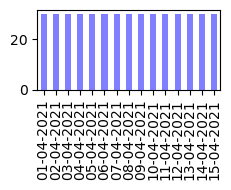

<Figure size 1000x1000 with 0 Axes>

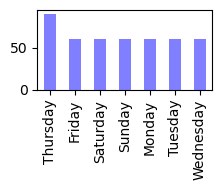

<Figure size 1000x1000 with 0 Axes>

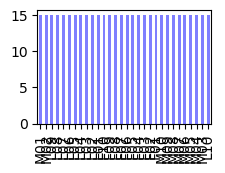

<Figure size 1000x1000 with 0 Axes>

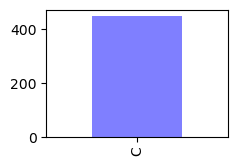

<Figure size 1000x1000 with 0 Axes>

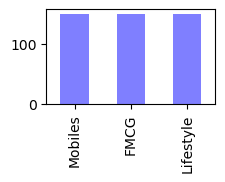

<Figure size 1000x1000 with 0 Axes>

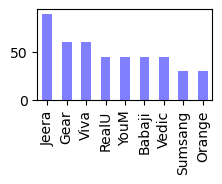

<Figure size 1000x1000 with 0 Axes>

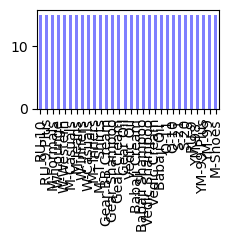

<Figure size 1000x1000 with 0 Axes>

In [26]:
for i,col in enumerate(cat_col):
    plt.subplot(3, 3, i + 1)
    df[col].value_counts().plot(kind='bar', color="blue", alpha=0.5)
    plt.tight_layout()
    plt.figure(figsize=(10,10))
    plt.show()

## STANDARDIZATION FOR NUMERICAL VARIABLES

In [27]:
cat_col

['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']

In [28]:
num_col

['Volume',
 'Avg Price',
 'Total Sales Value',
 'Discount Rate (%)',
 'Discount Amount',
 'Net Sales Value']

In [30]:
df[num_col]

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127
446,6,2600,15600,17.057027,2660.896242,12939.103758
447,2,1600,3200,18.965550,606.897606,2593.102394
448,3,1900,5700,16.793014,957.201826,4742.798174


In [31]:
means=df[num_col].mean()
means

Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64

In [32]:
print("mean of each  numerical col:\n",means)

mean of each  numerical col:
 Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64


In [33]:
std_dev=df[num_col].std()
print("standard deveation  of each  numerical col:\n",std_dev)

standard deveation  of each  numerical col:
 Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64


In [34]:
df_standardized=df.copy()

In [35]:
df_standardized[num_col]=(df[num_col]-means)/std_dev
df_standardized[num_col].head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2.347417,0.091072,2.922469,-0.829365,3.948422,2.801638
1,1.165831,-0.019548,1.329516,-0.851714,1.846958,1.269613
2,0.456880,0.312312,1.561038,-1.350129,1.621190,1.543957
3,0.220563,0.533552,1.717365,-1.947555,1.112568,1.763847
4,-0.488389,-0.130168,-0.188242,0.672990,0.227598,-0.227342


In [36]:
## diffrence in data before and after normalization

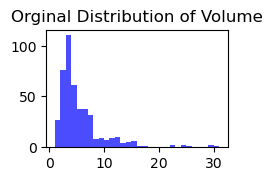

<Figure size 1000x1000 with 0 Axes>

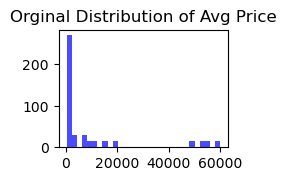

<Figure size 1000x1000 with 0 Axes>

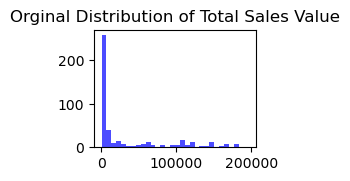

<Figure size 1000x1000 with 0 Axes>

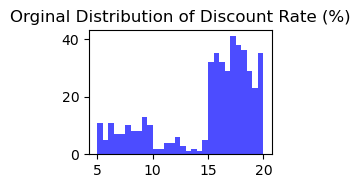

<Figure size 1000x1000 with 0 Axes>

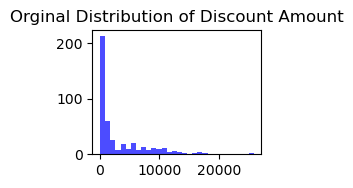

<Figure size 1000x1000 with 0 Axes>

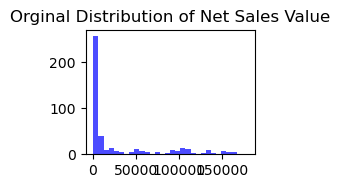

<Figure size 1000x1000 with 0 Axes>

In [37]:
## before standardization

for i, col in enumerate (num_col):
    plt.subplot(3,3,i+1)
    plt.hist(df[col],bins=30,color='blue',alpha=0.7)
    plt.title(f"Orginal Distribution of {col}")
    plt.tight_layout()
    plt.figure(figsize=(10,10))
    plt.show()

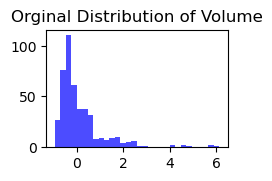

<Figure size 1000x1000 with 0 Axes>

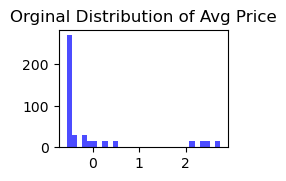

<Figure size 1000x1000 with 0 Axes>

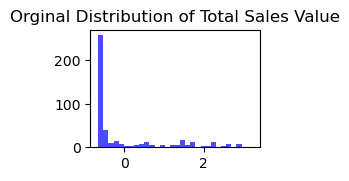

<Figure size 1000x1000 with 0 Axes>

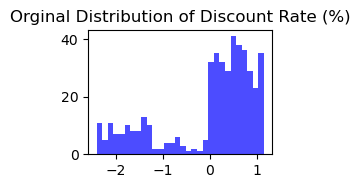

<Figure size 1000x1000 with 0 Axes>

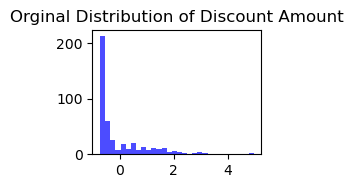

<Figure size 1000x1000 with 0 Axes>

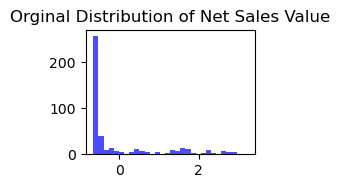

<Figure size 1000x1000 with 0 Axes>

In [38]:
## after standardization

for i, col in enumerate (num_col):
    plt.subplot(3,3,i+1)
    plt.hist(df_standardized[col],bins=30,color='blue',alpha=0.7)
    plt.title(f"Orginal Distribution of {col}")
    plt.tight_layout()
    plt.figure(figsize=(10,10))
    plt.show()

In [39]:
cat_col

['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']

In [40]:
encoder=OneHotEncoder(drop='first')

In [41]:
encoded_data=encoder.fit_transform(df[cat_col]).toarray()
encoded_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
encoded_cols=encoder.get_feature_names_out(cat_col)
encoded_cols

array(['Date_02-04-2021', 'Date_03-04-2021', 'Date_04-04-2021',
       'Date_05-04-2021', 'Date_06-04-2021', 'Date_07-04-2021',
       'Date_08-04-2021', 'Date_09-04-2021', 'Date_10-04-2021',
       'Date_11-04-2021', 'Date_12-04-2021', 'Date_13-04-2021',
       'Date_14-04-2021', 'Date_15-04-2021', 'Day_Monday', 'Day_Saturday',
       'Day_Sunday', 'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday',
       'SKU_F02', 'SKU_F03', 'SKU_F04', 'SKU_F05', 'SKU_F06', 'SKU_F07',
       'SKU_F08', 'SKU_F09', 'SKU_F10', 'SKU_L01', 'SKU_L02', 'SKU_L03',
       'SKU_L04', 'SKU_L05', 'SKU_L06', 'SKU_L07', 'SKU_L08', 'SKU_L09',
       'SKU_L10', 'SKU_M01', 'SKU_M02', 'SKU_M03', 'SKU_M04', 'SKU_M05',
       'SKU_M06', 'SKU_M07', 'SKU_M08', 'SKU_M09', 'SKU_M10',
       'BU_Lifestyle', 'BU_Mobiles', 'Brand_Gear', 'Brand_Jeera',
       'Brand_Orange', 'Brand_RealU', 'Brand_Sumsang', 'Brand_Vedic',
       'Brand_Viva', 'Brand_YouM', 'Model_Babaji Oil ',
       'Model_Babaji Shampoo', 'Model_Gear BB Cream', 

In [43]:
encoded_df=pd.DataFrame(encoded_data,columns=encoded_cols)
encoded_df

,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,Date_06-04-2021,Date_07-04-2021,Date_08-04-2021,Date_09-04-2021,Date_10-04-2021,Date_11-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
df_encoded=df.drop(columns=cat_col)
df_encoded

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127
446,6,2600,15600,17.057027,2660.896242,12939.103758
447,2,1600,3200,18.965550,606.897606,2593.102394
448,3,1900,5700,16.793014,957.201826,4742.798174


In [45]:
df_final = pd.concat([df_encoded,encoded_df],axis=1)
df_final.head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10,10100,101000,11.560498,11676.102961,89323.897039,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,16100,112700,9.456886,10657.910157,102042.089843,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,6,20100,120600,6.935385,8364.074702,112235.925298,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3,8100,24300,17.995663,4372.946230,19927.053770,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
